In [1]:
from google.colab import drive
import os

In [2]:
drive.mount('/content/gdrive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
root_dir="/content/gdrive/My Drive/project"

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
sns.set_palette('dark')

In [5]:
people=pd.read_csv(root_dir+"/people.csv")
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,type 2,group 17304,type 2,2021-06-29,type 5,type 5,type 5,type 3,type 11,type 2,type 2,True,False,False,True,True,False,True,False,False,False,False,True,False,False,False,False,False,True,True,False,True,True,False,False,True,True,True,False,36
1,ppl_100002,type 2,group 8688,type 3,2021-01-06,type 28,type 9,type 5,type 3,type 11,type 2,type 4,False,False,True,True,False,False,False,True,False,False,False,False,False,True,False,True,True,True,False,False,True,True,True,True,True,True,True,False,76
2,ppl_100003,type 2,group 33592,type 3,2022-06-10,type 4,type 8,type 5,type 2,type 5,type 2,type 2,True,True,True,True,True,True,False,True,False,True,False,True,True,True,True,True,True,True,True,False,False,True,True,True,True,False,True,True,99
3,ppl_100004,type 2,group 22593,type 3,2022-07-20,type 40,type 25,type 9,type 4,type 16,type 2,type 2,True,True,True,True,True,False,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,76
4,ppl_100006,type 2,group 6534,type 3,2022-07-27,type 40,type 25,type 9,type 3,type 8,type 2,type 2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,True,False,84


In [8]:
act_train=pd.read_csv(root_dir+"/act_train.csv",parse_dates=True)
act_test=pd.read_csv(root_dir+"/act_test.csv",parse_dates=True)

In [9]:
act_train.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,outcome
0,ppl_100,act2_1734928,2023-08-26,type 4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 76,0
1,ppl_100,act2_2434093,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
2,ppl_100,act2_3404049,2022-09-27,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
3,ppl_100,act2_3651215,2023-08-04,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0
4,ppl_100,act2_4109017,2023-08-26,type 2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 1,0


In [10]:
act_test.head()

,people_id,activity_id,date,activity_category,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10
0,ppl_100004,act1_249281,2022-07-20,type 1,type 5,type 10,type 5,type 1,type 6,type 1,type 1,type 7,type 4,NaN
1,ppl_100004,act2_230855,2022-07-20,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 682
2,ppl_10001,act1_240724,2022-10-14,type 1,type 12,type 1,type 5,type 4,type 6,type 1,type 1,type 13,type 10,NaN
3,ppl_10001,act1_83552,2022-11-27,type 1,type 20,type 10,type 5,type 4,type 6,type 1,type 1,type 5,type 5,NaN
4,ppl_10001,act2_1043301,2022-10-15,type 5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,type 3015


**Exploratory Data Analysis**

In [11]:
#merge two files
df_train=pd.merge(people,act_train,on='people_id')
df_test=pd.merge(people,act_test,on='people_id')

In [12]:
print(df_train.shape)
print(df_test.shape)

(2197291, 55)
(498687, 54)


In [13]:
#Drop rows where outcome is NA
df_train=df_train[df_train['outcome'].notna()]

In [14]:
#Checking missing values in each feature
df_train.isna().mean().round(4)*100

people_id             0.00
char_1_x              0.00
group_1               0.00
char_2_x              0.00
date_x                0.00
char_3_x              0.00
char_4_x              0.00
char_5_x              0.00
char_6_x              0.00
char_7_x              0.00
char_8_x              0.00
char_9_x              0.00
char_10_x             0.00
char_11               0.00
char_12               0.00
char_13               0.00
char_14               0.00
char_15               0.00
char_16               0.00
char_17               0.00
char_18               0.00
char_19               0.00
char_20               0.00
char_21               0.00
char_22               0.00
char_23               0.00
char_24               0.00
char_25               0.00
char_26               0.00
char_27               0.00
char_28               0.00
char_29               0.00
char_30               0.00
char_31               0.00
char_32               0.00
char_33               0.00
char_34               0.00
c

In [15]:
#How outcome is distributed(Checking for class imbalances)

In [16]:
df_train.drop(columns=['char_1_y','char_2_y','char_3_y','char_4_y','char_5_y','char_6_y','char_7_y','char_9_y'],inplace=True)
df_train=df_train[df_train['char_10_y'].notna()]

In [17]:
df_train.shape

(2039676, 47)

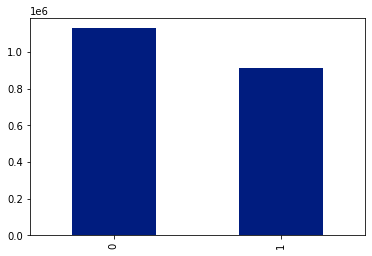

In [18]:
df_train.outcome.value_counts().plot(kind='bar')

In [20]:
g_0=df_train.groupby(['date_x','outcome'])['activity_id'].count().reset_index(name="count")

In [21]:
#Outcome of different activities datewise
fig_0=px.line(g_0,x='date_x',y='count',color='outcome')
fig_0.update_xaxes(rangeslider_visible=True)
fig_0.update_layout(
    title="Outcome of different activities datewise",
    xaxis_title="activity date_x",
    yaxis_title="Count by outcome")
fig_0.show()

In [22]:
g=df_train.groupby(['date_y','outcome'])['activity_id'].count().reset_index(name="count")

In [23]:
#Outcome of different activities datewise for date_y
fig=px.line(g,x='date_y',y='count',color='outcome')
fig.update_xaxes(rangeslider_visible=True)
fig.update_layout(
    title="Outcome of different activities datewise",
    xaxis_title="activity date_y",
    yaxis_title="Count by outcome")
fig.show()

In [57]:
#Checking Class probability i.e. Probability for outcome being 1 for date_x and date_y

In [58]:
g_2=df_train.groupby('date_x')['outcome'].mean().reset_index(name="Probability")

In [59]:
fig_2=px.line(g_2,x='date_x',y='Probability')
fig_2.update_xaxes(rangeslider_visible=True)
fig_2.update_layout(
    title="Probability of class 1 by date_x",
    xaxis_title="Date_x",
    yaxis_title="Probability")
fig_2.show()

In [60]:
#Similarly finding class probability for date_y
g_3=df_train.groupby('date_y')['outcome'].mean().reset_index(name="Probability")

In [61]:
fig_3=px.line(g_3,x='date_y',y='Probability')
fig_3.update_xaxes(rangeslider_visible=True)
fig_3.update_layout(
    title="Probability of class 1 by date_y",
    xaxis_title="Date_y",
    yaxis_title="Probability")
fig_3.show()

Exploring Group variable

In [62]:
#Groups by outcome 0 or 1
g_6=df_train.groupby(['group_1','outcome'])['activity_id'].count().reset_index(name="count")

In [63]:
#TOP 10 best performing groups
g_6_top=g_6.loc[g_6['outcome'] == 1].sort_values(by='count',ascending=False).head(n=10)

In [64]:
#Top 10 worst performing groups
g_6_bottom= g_6.loc[g_6['outcome']==0].sort_values(by='count',ascending=False).head(n=10)

In [65]:
fig_6=px.bar(g_6_top,x="group_1", y="count")
fig_6.update_layout(
    title="Top 10 performing groups",
    xaxis_title="group number",
    yaxis_title="Number of activities completed")
fig_6.show()


In [66]:
fig_7=px.bar(g_6_bottom,x="group_1", y="count")
fig_7.update_layout(
    title="Top 10 non-performing groups",
    xaxis_title="group number",
    yaxis_title="Number of activities not completed")
fig_7.show()

In [68]:
#Percentage of activites completed by each group
g_7=g_6.pivot(index='group_1',columns='outcome',values='count')
g_7.fillna(0,inplace=True)
g_7['group_number']=g_7.index




In [69]:
g_7.reset_index(drop=True,inplace=True)

In [70]:
g_7.rename(columns={0: "outcome_0", 1: "outcome_1"},inplace=True)

In [71]:
g_7['Total']=g_7['outcome_0']+g_7['outcome_1']

In [72]:
g_7['Percentage']=(g_7['outcome_1']/g_7['Total'])*100

In [73]:
#Masking outlier with mean values
g_7['outcome_0'] = g_7['outcome_0'].mask(g_7['outcome_0'] >2000,g_7.mean(axis=0)[0])

In [74]:
#Checking the distribution between outcome_0 and outcome_1
fig_10= px.scatter(g_7, x="outcome_0", y="outcome_1")
fig_10.update_layout(
    title="outcome_1 vs outcome_0",
    xaxis_title="Outcome=0",
    yaxis_title="Outcome=1")
fig_10.show()


The above graph shows a tailing effect in the distribution of outcome 1 v/s outcome 0

In [75]:
#Creating percentage bins
g_7['percentage_bins'] = pd.cut(x=g_7['Percentage'],bins=[-0.01,25,50,75,100])

In [76]:
g_8=g_7.groupby('percentage_bins')['Percentage'].count().reset_index(name="Count")

In [77]:
fig_11= go.Figure(data=go.Scatter(x=g_8['percentage_bins'].astype('str'),y=g_8['Count']))
fig_11.update_layout(
    title='Percentage outcome by bins of size=25',
    xaxis_title="percentage bins",
    yaxis_title="Count")
fig_11.show()

In [56]:
#Outcome by each category type
g_1=df_train.groupby(['activity_category','outcome'])['activity_category'].count().reset_index(name='count')

In [30]:
fig_1=px.bar(g_1, x="activity_category", y="count", color=g_1['outcome'].astype('str'), barmode='group')
fig_1.update_layout(
    title="Count of outcome by each activity category type",
    xaxis_title="activity type",
    yaxis_title="Count by outcome")
fig_1.show()


Seems like activity 3 is difficult to complete and similarly activity 5

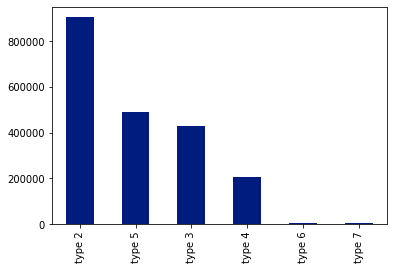

In [31]:
# how activity category is distributed
df_train.activity_category.value_counts().plot(kind='bar')

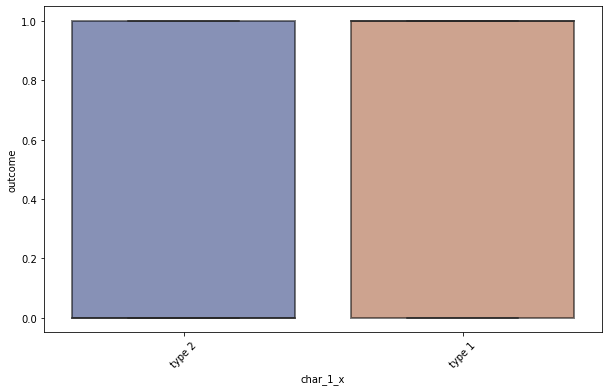

In [33]:
#  How is the char_1 associated with outcome
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='char_1_x', y='outcome', data=df_train)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()

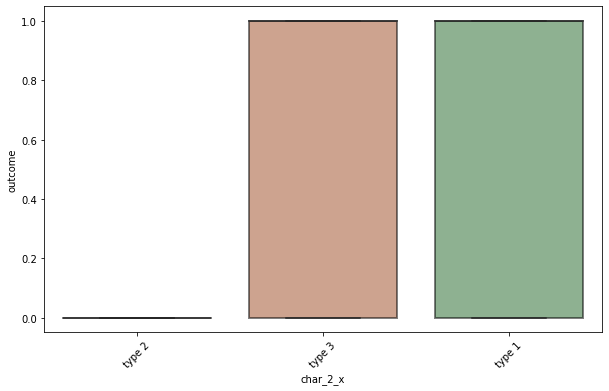

In [34]:
# checking how char_2 is associated with outcome
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='char_2_x', y='outcome', data=df_train)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()

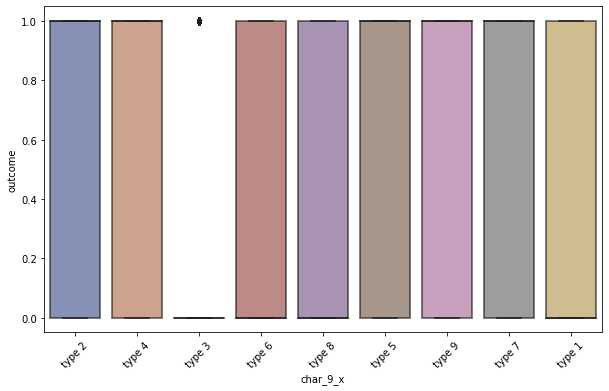

In [35]:

#checking how char_9 is associated with outcome
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='char_9_x', y='outcome', data=df_train)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()

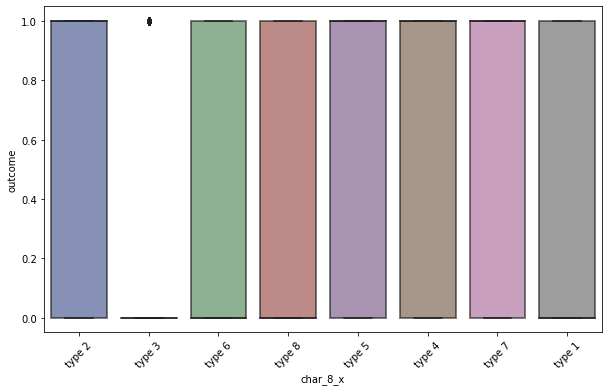

In [36]:
#checking how char_8 is associated with outcome
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='char_8_x', y='outcome', data=df_train)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()

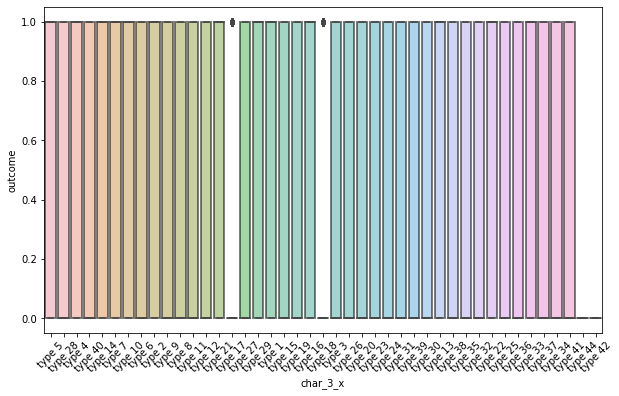

In [37]:
#checking how char_3_x is associated with outcome
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='char_3_x', y='outcome', data=df_train)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)
plt.show()

Looks like their arent much outliers, except for type 3 in char_9_x lets see if we can find more about the distribution of char_9_x.

In [38]:
df.char_9_x.describe()

count     2197291
unique          9
top        type 3
freq       972575
Name: char_9_x, dtype: object

Lets see how the ouctome is balanced for char_1_ x to char_9_x

In [39]:
df_chosen = df_train[['char_1_x','char_2_x','char_3_x','char_4_x','char_5_x','char_6_x','char_7_x','char_8_x','char_9_x', 'outcome']]
df_chosen.shape

(2039676, 10)

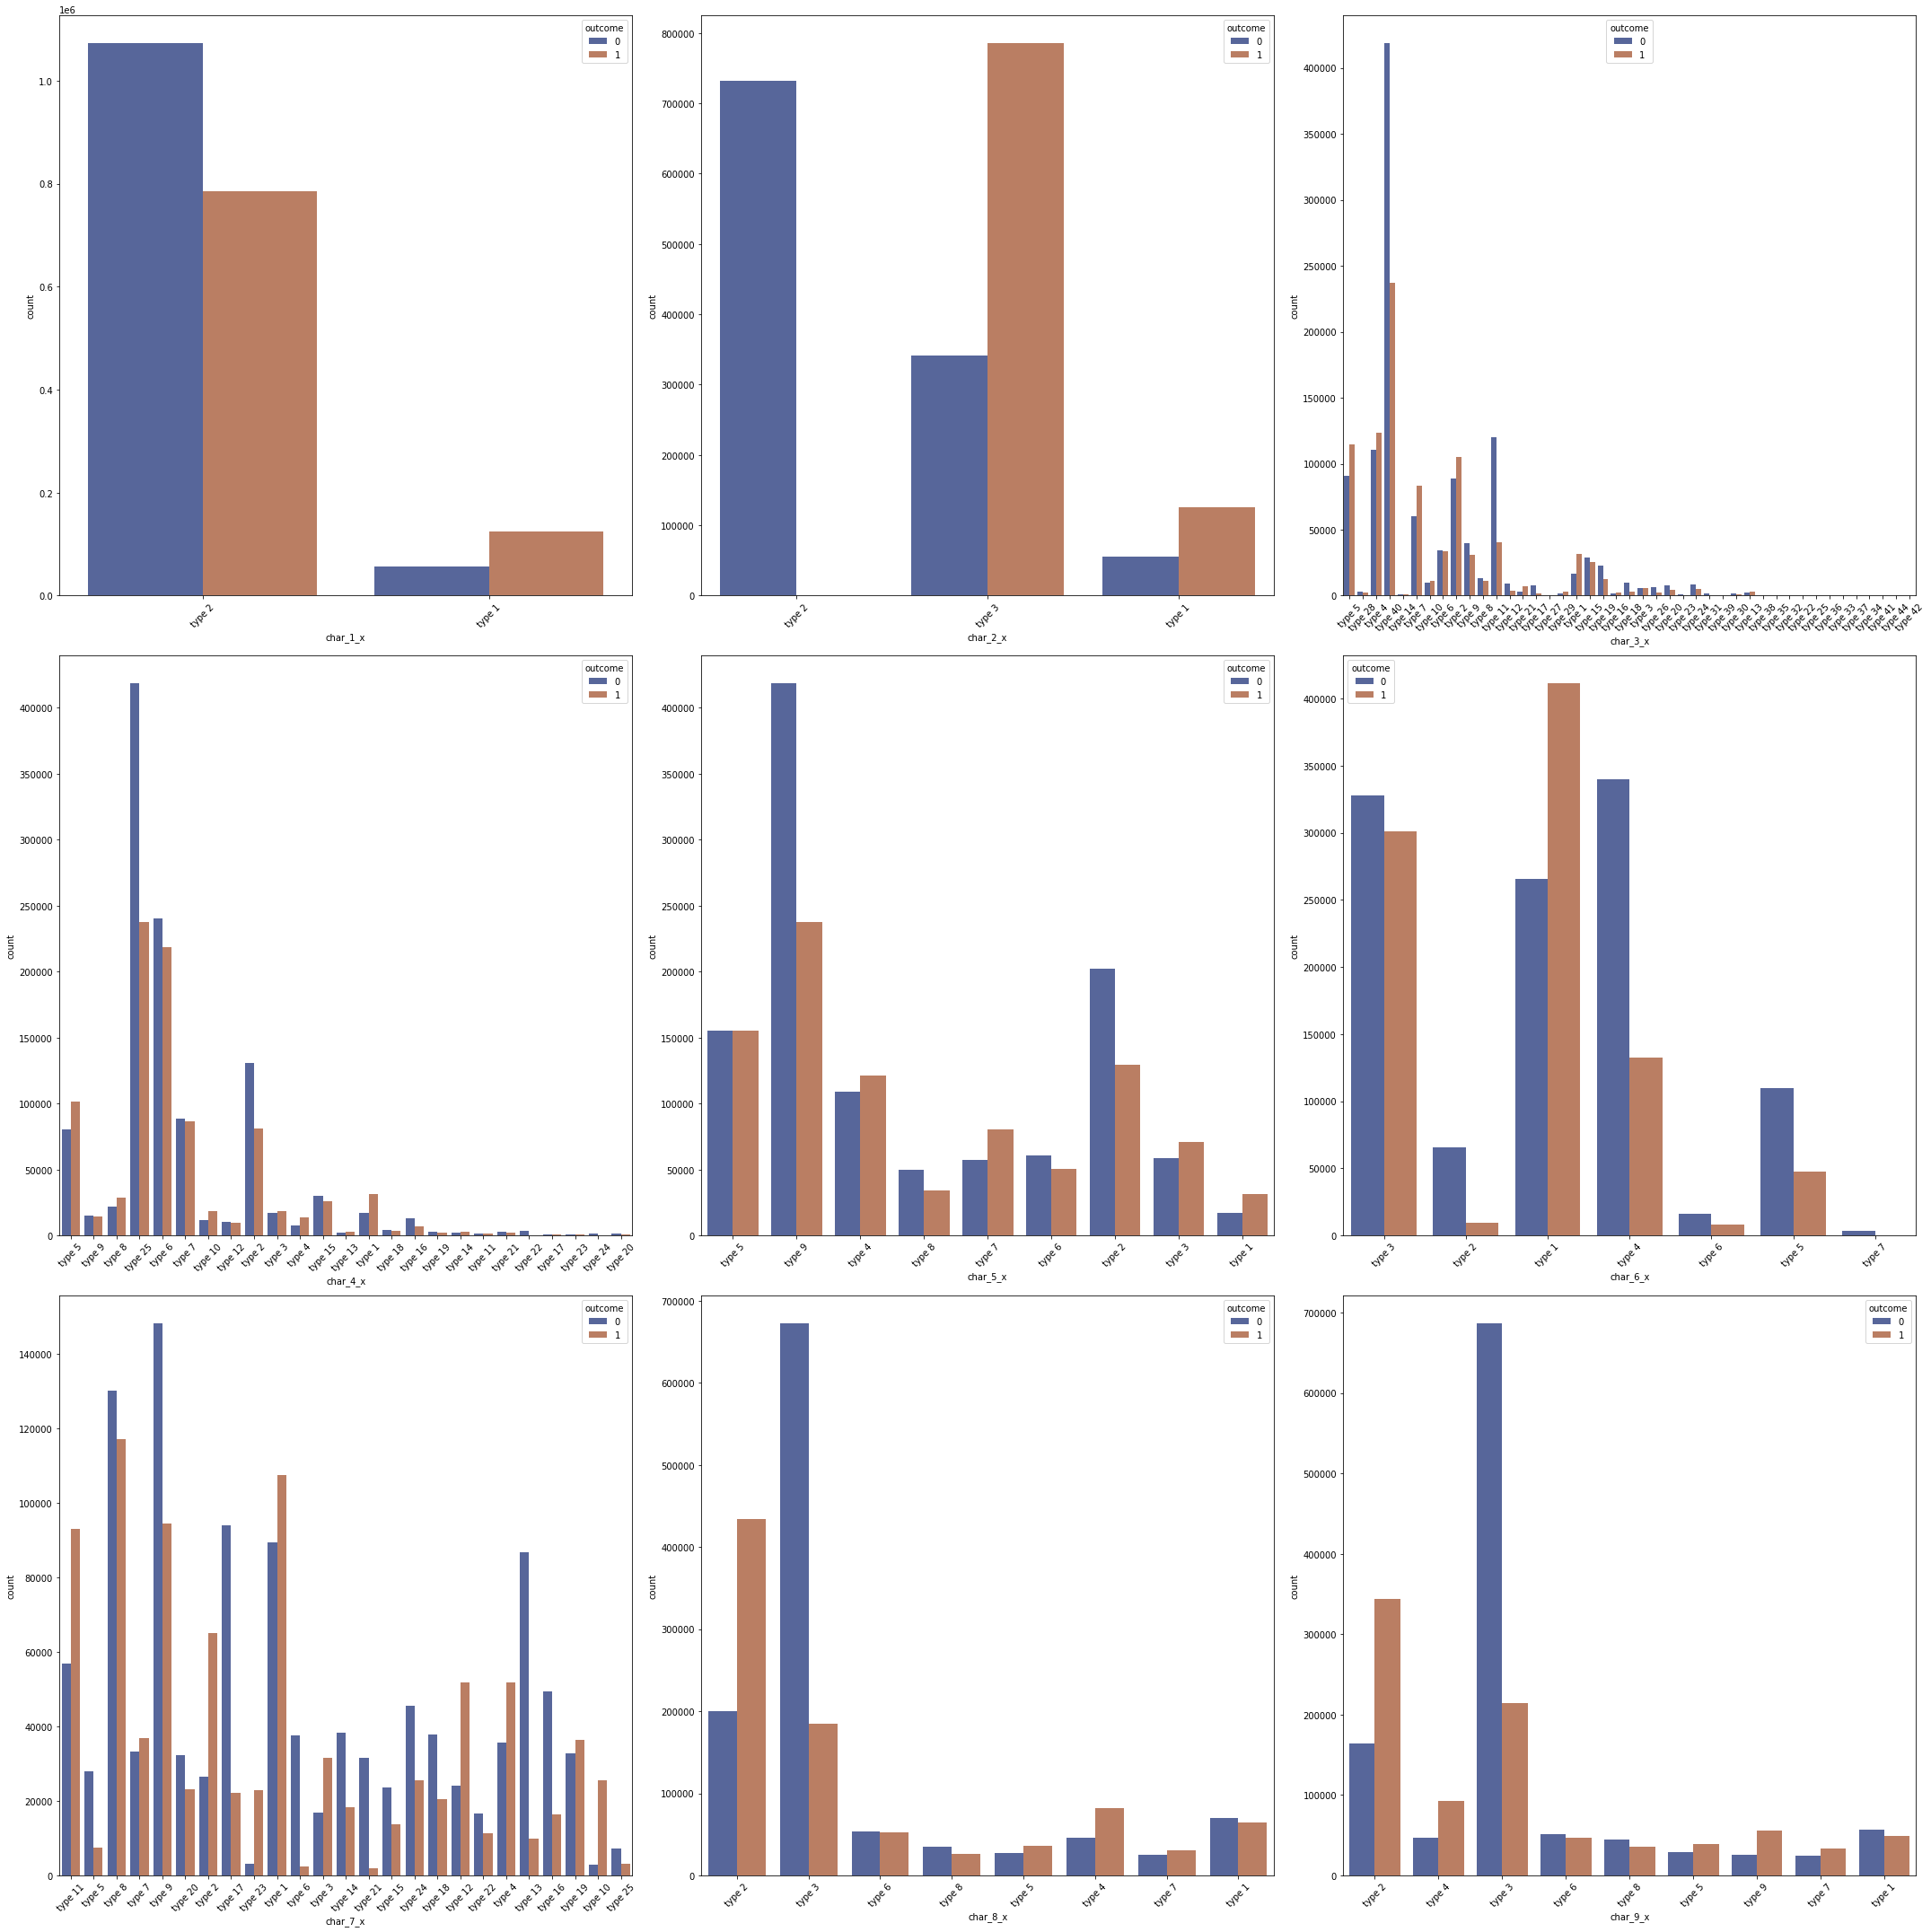

In [40]:
fig, axes = plt.subplots(round(len(df_chosen.columns) / 3), 3, figsize=(30, 30))

for i, ax in enumerate(fig.axes):
    if i < len(df_chosen.columns):
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        sns.countplot(x=df_chosen.columns[i], hue='outcome', alpha=0.7, data=df_chosen, ax=ax)

fig.tight_layout()
plt.show()

Also, Since we have a lot of categorical data, from char_10_x to char_37_x, we see how they are correlated to outcome using Point BiSerial Correlation

In [41]:
from scipy.stats import pointbiserialr

In [42]:
pbc = pointbiserialr(df['char_10_x'], df['outcome'])
pbc[0]

0.26901948849488544

In [43]:
df_binary_category = df_train[df_train.columns[12:40]]
df_binary_category['outcome'] = df_train['outcome']
df_binary_category.shape

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



(2039676, 29)

In [44]:
correlation = []
for i in df_binary_category.columns:
  pbc = pointbiserialr(df_binary_category[i],df_binary_category['outcome'])
  correlation.append(pbc[0])

correlation

[0.2671950836948398,
 0.22357623916272584,
 0.22273868830104324,
 0.32093503843687404,
 0.24555152901596716,
 0.262100497715039,
 0.27727271983499424,
 0.28612975575751765,
 0.20921226936657572,
 0.27729426403475077,
 0.27085891724464173,
 0.27740752970646465,
 0.2845293026585496,
 0.26936944452426415,
 0.21900534471090655,
 0.28729930058011754,
 0.1703271416902628,
 0.23320743067223115,
 0.27658670094889537,
 0.1848444934180346,
 0.20881821803754497,
 0.2522826221539566,
 0.27698444774462794,
 0.21169345664026715,
 0.31211644842523484,
 0.21263806548834505,
 0.3154540887792164,
 0.2879166456848961,
 1.0]

In [45]:
Correlated_features = [[i,j] for i,j in enumerate(correlation) if j> 0.28]
Correlated_features

[[3, 0.32093503843687404],
 [7, 0.28612975575751765],
 [12, 0.2845293026585496],
 [15, 0.28729930058011754],
 [24, 0.31211644842523484],
 [26, 0.3154540887792164],
 [27, 0.2879166456848961],
 [28, 1.0]]

In [46]:
# Most highly correlated features :
new_list=[]
column_name = df_binary_category.columns
for i in Correlated_features:
  for j in range(len(column_name)):
    # print(j)
    if i[0] == j:
      new_list.append((column_name[j], i[1]))
new_list.sort(key=lambda x : x[1],reverse=True)

In [47]:
new_list

[('outcome', 1.0),
 ('char_13', 0.32093503843687404),
 ('char_36', 0.3154540887792164),
 ('char_34', 0.31211644842523484),
 ('char_37', 0.2879166456848961),
 ('char_25', 0.28729930058011754),
 ('char_17', 0.28612975575751765),
 ('char_22', 0.2845293026585496)]

Most Correlated Features are : char_13, char_36 , char_34

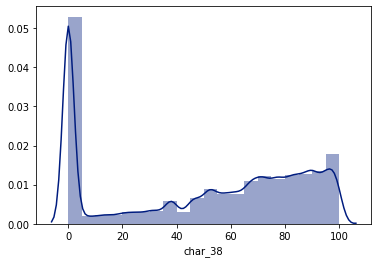

In [48]:
#Finally lets see how char_38 is distributed being the only continous variable we have 
sns.distplot(df['char_38'], bins = 20)
plt.show()

In [50]:
non_zero = np.count_nonzero(df_train['char_38'])

In [54]:
df_train.shape

(2039676, 47)

In [52]:
zeros = 2039676 - non_zero

In [55]:
print("Approximately " + str(zeros) + " values are zero in char_38 , which is " + str((zeros/2039676)*100) + "%")

Approximately 673807 values are zero in char_38 , which is 33.03500163751497%


Now we try to encode our data and check for correlations using heat map.

In [78]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [79]:
l = people.columns
l= l.drop(['group_1','people_id','date'])

In [80]:
for col in l:
  people[col] = encoder.fit_transform(people[col].astype(str))

In [81]:
people.head()

,people_id,char_1,group_1,char_2,date,char_3,char_4,char_5,char_6,char_7,char_8,char_9,char_10,char_11,char_12,char_13,char_14,char_15,char_16,char_17,char_18,char_19,char_20,char_21,char_22,char_23,char_24,char_25,char_26,char_27,char_28,char_29,char_30,char_31,char_32,char_33,char_34,char_35,char_36,char_37,char_38
0,ppl_100,1,group 17304,1,2021-06-29,38,20,4,2,2,1,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,31
1,ppl_100002,1,group 8688,2,2021-01-06,20,24,4,2,2,1,3,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,1,1,0,0,1,1,1,1,1,1,1,0,75
2,ppl_100003,1,group 33592,2,2022-06-10,33,23,4,1,20,1,1,1,1,1,1,1,1,0,1,0,1,0,1,1,1,1,1,1,1,1,0,0,1,1,1,1,0,1,1,100
3,ppl_100004,1,group 22593,2,2022-07-20,34,17,8,3,7,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,75
4,ppl_100006,1,group 6534,2,2022-07-27,34,17,8,2,23,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,84


In [82]:
char_data = people[['char_1', 'char_2','char_3','char_4', 'char_5','char_6','char_7','char_8','char_9']]
char_data['outcome'] = df_train['outcome']
char_data.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,char_1,char_2,char_3,char_4,char_5,char_6,char_7,char_8,char_9,outcome
0,1,1,38,20,4,2,2,1,1,0.0
1,1,2,20,24,4,2,2,1,3,0.0
2,1,2,33,23,4,1,20,1,1,0.0
3,1,2,34,17,8,3,7,1,1,0.0
4,1,2,34,17,8,2,23,1,1,0.0


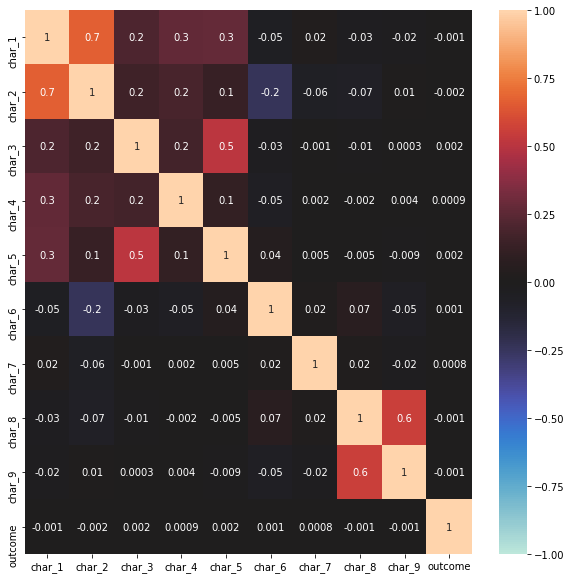

In [83]:
data_corr = char_data.corr(method='pearson')
plt.figure(figsize=(10,10))
sns.heatmap(data=data_corr, annot=True, fmt='.1g', vmin=-1,vmax=1,center=0)
plt.show()


Above heatmap shows that char_2 and char_1 are highly correlated (positive) and char_8 & char_9 highly correlated(positive), char_3 and char_5.

Features most correlated with outcome is : char_2